#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: [https://bit.ly/SC7DS_DatasetExercise](https://bit.ly/SC7DS_DatasetExercise)

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter (1).csv
Saving penguins_size.csv to penguins_size (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv']))
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv']))

Memanggil tabel data

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


***
**Insight**
***
Berapa rata - rata body mass penguin?

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)

Mengisi missing value pada sex dengan modus!

In [ ]:
data['sex'] = data['sex'].fillna('MALE')

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut!

In [ ]:
data.drop(data[data['sex']=='.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [ ]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value?

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

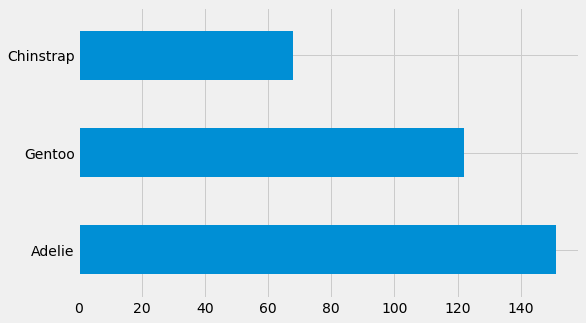

In [ ]:
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak?

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

culmen_length vs flipper_length


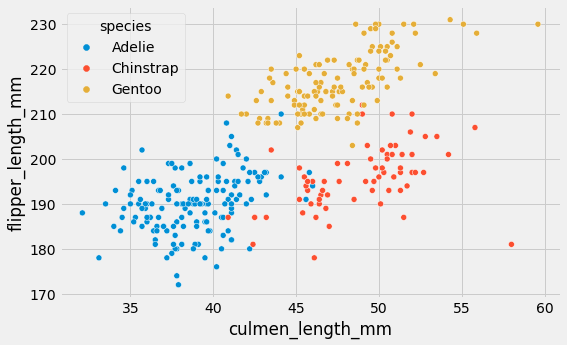

In [ ]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


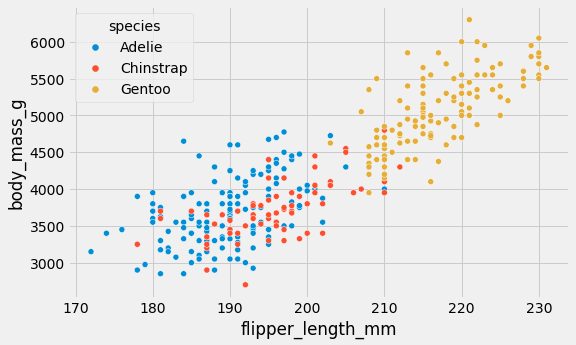

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

Tampilkan pairplot dari semua variabel!

Pairplot


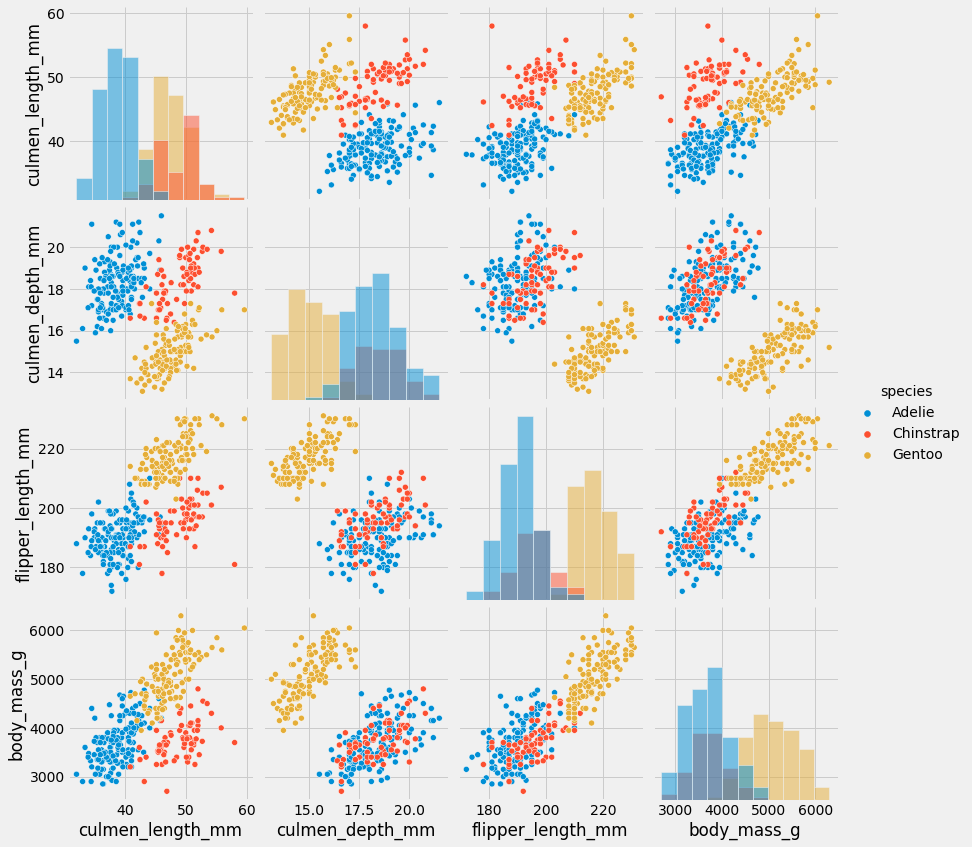

In [ ]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

#**Module 3a: Machine Learning**

##**Data Encoding**

Lakukan data encoding pada kolom 'species' dan 'island'!

In [ ]:
#input your code here

Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [ ]:
#input your code here

***
**Insight**
***
Bagaimana dataset setelah dilakukan encoding?

##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [ ]:
#input your code here

##**Scaling the Data**

Lakukan scaling pada x!

In [ ]:
from sklearn import preprocessing

In [ ]:
#input your code here

##**Splitting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#input your code here

##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#input your code here